<p style="text-align: center;font-size: 40pt">Rigid transformation in 2D</p>

In [1]:
%matplotlib widget
#%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np

import ipywidgets as widgets

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/lessons/transformations_3d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Requirements
- [Transformation functions in 2D](2-lesson_transformation.ipynb)

Objectives of this lesson:

- understand how to combine basic transformation functions
- understand the importance of the order in which transformations are applied
- differentiate coordinate and transformation space
- convert coordinates from a frame to another one

Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\newcommand{\textcomma}{\quad\text{,}}$
$\newcommand{\textdot}{\quad\text{.}}$
$\newcommand{\vec}[1]{\overrightarrow{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\pointsym}[2][]{{}^{#1}\boldsymbol{#2}}$
$\newcommand{\matsym}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand{\F}[2][]{{}_{#2}^{#1}\mathscr{F}}$
$\newcommand{\Fmat}[2][]{{}_{#2}^{#1}\mat{F}}$
$\newcommand{\origin}[2][]{{}_{#2}^{#1}\mat{o}}$
$\newcommand{\T}[2][]{{}_{#2}^{#1}\mat{T}}$
$\newcommand{\t}[2][]{{}_{#2}^{#1}\mat{t}}$
$\newcommand{\R}[2][]{{}_{#2}^{#1}\mat{R}}$
$\newcommand{\f}{\vec{\mathscr{f}}}$
$\newcommand{\ax}[2][]{{}_{#2}^{#1}\vec{\mathscr{x}}}$
$\newcommand{\ay}[2][]{{}_{#2}^{#1}\vec{\mathscr{y}}}$
$\newcommand{\az}[2][]{{}_{#2}^{#1}\vec{\mathscr{z}}}$
$\newcommand{\aw}[2][]{{}_{#2}^{#1}\vec{\mathscr{w}}}$
$\newcommand{\axi}{\mathscr{x}}$
$\newcommand{\ayi}{\mathscr{y}}$
$\newcommand{\azi}{\mathscr{z}}$
$\newcommand{\awi}{\mathscr{w}}$
$\newcommand{\pointx}[2][]{{}^{#1}{#2}_{\axi}}$
$\newcommand{\pointy}[2][]{{}^{#1}{#2}_{\ayi}}$
$\newcommand{\pointz}[2][]{{}^{#1}{#2}_{\azi}}$
$\newcommand{\SO}[1]{\mathrm{SO}(#1)}$
----

# Combining basic transformations

The combination of rotation and translation is of special interest for point cloud registrations and in robotics in general.
This combination is called a **rigid transformation** $\mat{T}$ and is defined as follow in homogeneous coordinates
\begin{aligned}
\mat{P}' 
&= \matsym{\Theta}_\text{t} \matsym{\Theta}_\text{r} \mat{P} \\
&= \begin{bmatrix} 
1 & 0 & t_\axi \\ 
0 & 1 & t_\ayi \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix} 
\cos\theta & -\sin\theta & 0 \\ 
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\mat{P} \\
&=
\begin{bmatrix} 
\cos\theta & -\sin\theta & t_\axi \\ 
\sin\theta & \cos\theta & t_\ayi \\
0 & 0 & 1
\end{bmatrix}
\mat{P}
\\
&=
\begin{bmatrix} 
\mat{R} & \mat{t} \\ 
\mat{0}^T & 1
\end{bmatrix}
\mat{P}
\\
&=
\mat{T}
\mat{P}
\textdot
\end{aligned}

This kind of transformation has the property to preserve distances between pairs of points.
Although, all packed in the same matrix $\mat{T}$, this transformation has the effect of first rotating the point cloud and then translating it.

**Pro tip**: As explained in a prior lesson, we can reverse a transformation using the inverse $\mat{T}^{-1}$.
Lets have a look at how it can be computed from its rotational and translational components instead of blindly calling `np.linalg.inv()`.
We can by the definition of the inverse 

\begin{aligned}
\mat{T}^{-1} \mat{T} = \mat{I}
\textcomma
\end{aligned}

and expand from there to search for individual components $\mat{A}$ and $\mat{b}$, such that

\begin{aligned}
\bmat{\mat{A} & \mat{b} \\ \mat{0}^T & 1} \bmat{\mat{R} & \mat{t} \\ \mat{0}^T & 1} 
= \bmat{\mat{I} & \mat{0} \\ \mat{0}^T & 1}
\textdot
\end{aligned}

We can solve for $\mat{A}$ using

\begin{aligned}
\mat{A} \mat{R} + \mat{b} \mat{0}^T &= \mat{I} \\
\mat{A} \mat{R} \mat{R}^{-1} &= \mat{I} \mat{R}^{-1} \\
\mat{A} &= \mat{R}^{-1} \\
\mat{A} &= \mat{R}^{T}
\textcomma
\end{aligned}

and for $\mat{b}$ using 

\begin{aligned}
\mat{A} \mat{t} + \mat{b} &= \mat{0} \\
\mat{b} &= -\mat{A} \mat{t} \\
\mat{b} &= -\mat{R}^{T} \mat{t}
\textcomma
\end{aligned}

leading to 

\begin{aligned}
\mat{T}^{-1} = \bmat{\mat{R}^T & -\mat{R}^T \mat{t} \\ \mat{0}^T & 1}
\textdot
\end{aligned}

This formulation is much more efficient than simply using the inverse.

In [2]:
theta=1.6
tx=-1.1; ty=-3.5
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
t = np.array([tx, ty]).reshape(2,1)
T = np.hstack((R,t))
T = np.vstack((T,[0,0,1]))


print("With inverse (take some time to compute)")
score1 = %timeit -o T_inv = np.linalg.inv(T)
T_inv = np.linalg.inv(T)
print(T_inv)

print("\nWithout inverse (take some time to compute)")
score2 = %timeit -o T_inv = np.identity(3); T_inv[0:2,0:2] = R.T; T_inv[0:2,2] = (-R.T @ t).flatten();
T_inv = np.identity(3); T_inv[0:2,0:2] = R.T; T_inv[0:2,2] = (-R.T @ t).flatten();
print(T_inv)

print("\nImprovement of %.2f%%" % (((score1.best-score2.best)/score1.best)*100))

With inverse (take some time to compute)
33.4 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[[-0.03  1.    3.47]
 [-1.   -0.03 -1.2 ]
 [ 0.    0.    1.  ]]

Without inverse (take some time to compute)
29 µs ± 377 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[[-0.03  1.    3.47]
 [-1.   -0.03 -1.2 ]
 [ 0.    0.    1.  ]]

Improvement of 14.08%


Here is an example of a rigid transformation and its inverse decomposed in rotation and translation to better illustrate how points are moved.

In [3]:
## homogeneous coordinates
P = np.array([[0., 1., 2.5, 2.5],
              [2., 1., 2., 3.],
              [1., 1., 1., 1.]])

theta=1.6
tx=-1.1; ty=-3.5
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
t = np.array([[tx],
              [ty]])
T = np.hstack((R,t))
T = np.vstack((T,[0,0,1]))

Theta = np.copy(T)
# force translation to zero
Theta[0:2,2] = 0

P_prime = T @ P #@ is the matrix multiplication operator in python
P_phatom = Theta @ P

# inverse transformation
T_inv = np.linalg.inv(T)

Theta_inv = np.copy(T_inv)
# force translation to zero
Theta_inv[0:2,2] = 0

P_reverse = T_inv @ P_prime
P_phatom_reverse = Theta_inv @ P_prime

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# first axis
draw_frame(axs[0], name="$A$", color = "tab:blue")
clean_frame(axs[0], [P, P_prime, P_phatom, P_phatom_reverse], "A rigid transformation")

for i in np.arange(0,P.shape[1]):
    draw_point(axs[0], P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(axs[0], P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(-0.1, -0.7), color="tab:red")
    draw_angle_vectors(axs[0], P[0:2,i], v2=P_phatom[0:2,i], text="")
    draw_vector(axs[0], P_prime[0:2,i], origin=P_phatom[0:2,i], text="")

# second axis
draw_frame(axs[1], name="$A$", color = "tab:blue")
clean_frame(axs[1], [P, P_prime, P_phatom, P_phatom_reverse], "A reverse rigid transformation")

for i in np.arange(0,P.shape[1]):
    draw_point(axs[1], P_prime[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(axs[1], P_reverse[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")
    draw_angle_vectors(axs[1], P_prime[0:2,i], v2=P_phatom_reverse[0:2,i], text="", flip=True)
    draw_vector(axs[1], P_reverse[0:2,i], origin=P_phatom_reverse[0:2,i], text="")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Homogeneous coordinates are very useful when you want to apply multiple transformations in a row (i.e., when you want to chain transformations).
For example, when chaining two transformations in Cartesian coordinates, you would have to do

\begin{aligned}
\mat{p}' = \mat{R}_2 (\mat{R}_1 \mat{p} + \mat{t}_1 ) + \mat{t}_2
\textcomma
\end{aligned}

which is more complicated than in homogeneous coordinates where you simply do

\begin{aligned}
\mat{P}' = \mat{T}_2 \mat{T}_1 \mat{P}
\textdot
\end{aligned}

When chaining rigid transformation matrices, it is very important to recall that the order in which matrices are applied matters.
For example

\begin{aligned}
\mat{T}_1 \mat{T}_2 \mat{P}
\neq
\mat{T}_2 \mat{T}_1 \mat{P}
\textdot
\end{aligned}

A way to visualize this inequality is to follow each transformation separately.
Recall that in $\mat{P}' = \mat{T}_2 \mat{T}_1 \mat{P}$ the point cloud is first rotated by $\mat{R}_1$, then translated by $\mat{t}_1$, then rotated by $\mat{R}_2$, and finally translated by $\mat{t}_2$.

In [4]:
## homogeneous coordinates
P = np.array([[0., 3.5],
              [-1.5, 3.],
              [1., 1.]])

theta = 2.6; tx=-1.5; ty=-1.2;
T1 = np.array([[np.cos(theta), -np.sin(theta), tx],
               [np.sin(theta),  np.cos(theta), ty],
               [0,0,1]])
theta = 0.8; tx=-0.3; ty=-1.8;
T2 = np.array([[np.cos(theta), -np.sin(theta), tx],
               [np.sin(theta),  np.cos(theta), ty],
               [0,0,1]])

#=======================
P_prime_21 = T2 @ T1 @ P
P_prime_12 = T1 @ T2 @ P
#=======================

# extract step by step
Theta1 = np.copy(T1); Theta1[0:2,2] = 0
t1 = np.copy(T1); t1[0:2,0:2] = np.identity(2)
Theta2 = np.copy(T2); Theta2[0:2,2] = 0
t2 = np.copy(T2); t2[0:2,0:2] = np.identity(2)

# apply step by step
P_step1 = Theta1 @ P # rotate
P_step2 = t1 @ P_step1 # translate
P_step3 = Theta2 @ P_step2 # rotate
P_step4 = t2 @ P_step3 # translate


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# first axe
ax=axs[0]
draw_frame(ax, name="", color = "tab:blue")
clean_frame(ax, [P, P_step1, P_step2, P_step3, P_prime_21, P_prime_12], "$\mathbf{P}'=\mathbf{T}_2\mathbf{T}_1\mathbf{P}$, the other order is in grey")

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, -1.0))
    draw_point(ax, P_prime_21[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(-1.0, -1.0), color="tab:red")
    draw_point(ax, P_prime_12[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, -0.7), color="dimgrey")
    
    draw_angle_vectors(ax, P[0:2,i], v2=P_step1[0:2,i], text="")
    draw_vector(ax, P_step2[0:2,i], origin=P_step1[0:2,i], text="")
    draw_angle_vectors(ax, P_step2[0:2,i], v2=P_step3[0:2,i], text="", color="tab:orange")
    draw_vector(ax, P_step4[0:2,i], origin=P_step3[0:2,i], text="", color="tab:orange")

# apply step by step
P_step1 = Theta2 @ P # rotate
P_step2 = t2 @ P_step1 # translate
P_step3 = Theta1 @ P_step2 # rotate
P_step4 = t1 @ P_step3 # translate

# second axe
ax=axs[1]
draw_frame(ax, name="", color = "tab:blue")
clean_frame(ax, [P, P_step1, P_step2, P_step3, P_prime_12, P_prime_21], "$\mathbf{P}'=\mathbf{T}_1\mathbf{T}_2\mathbf{P}$, the other order is in grey")

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0., 0.3))
    draw_point(ax, P_prime_12[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(-1.0, -1.0), color="tab:red")
    draw_point(ax, P_prime_21[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(-1.0, 0.2), color="dimgrey")
    
    draw_angle_vectors(ax, P[0:2,i], v2=P_step1[0:2,i], text="", color="tab:orange")
    draw_vector(ax, P_step2[0:2,i], origin=P_step1[0:2,i], text="", color="tab:orange")
    draw_angle_vectors(ax, P_step2[0:2,i], v2=P_step3[0:2,i], text="")
    draw_vector(ax, P_step4[0:2,i], origin=P_step3[0:2,i], text="")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

The following script shows the improvement in computation time between rotating and translating each point in a for loop versus using the rigid transform directly with the point cloud :

In [5]:
## homogeneous coordinates
P = np.array([[0., 1., 2.5, 2.5],
              [2., 1., 2., 3.],
              [1., 1., 1., 1.]])

# Define transform params
theta=1.6
tx=-1.1; ty=-3.5
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
t = np.array([[tx],
              [ty]])
T = np.hstack((R,t))
T = np.vstack((T,[0,0,1]))
P_prime = np.zeros((P.shape))
P_prime[2,:] = 1

# for loop transform
print("For loop (take some time to compute)")
score1 = %timeit -o for i in range(P.shape[1]): P_prime[:2,i] = R @ P[:2,i] + T[:2,2] ;
print(P_prime)

# Rigid transform


Theta = np.copy(T)
# force translation to zero
Theta[0:2,2] = 0

print("\nRigid transform (take some time to compute)")
score2 = %timeit -o P_prime = T @ P; #@ is the matrix multiplication operator in python
P_prime = T @ P;
print(P_prime)

print("\nImprovement of %.2f%%" % (((score1.best-score2.best)/score1.best)*100))

For loop (take some time to compute)
45.9 µs ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
[[-3.1  -2.13 -3.17 -4.17]
 [-3.56 -2.53 -1.06 -1.09]
 [ 1.    1.    1.    1.  ]]

Rigid transform (take some time to compute)
4.71 µs ± 249 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[[-3.1  -2.13 -3.17 -4.17]
 [-3.56 -2.53 -1.06 -1.09]
 [ 1.    1.    1.    1.  ]]

Improvement of 89.53%


# Transformation space

One thing to keep in mind at this point is the difference between the point cloud space, where 2D  points are defined in $\real^2$, and the parameter space, where our rigid transformation parameters are defined in $\real^3$ (2 parameters for translation and 1 for rotation).
Both of these spaces are Cartesian.
We will see later that 3D points needs a 6D parameter space, which sometimes leads to confusion in the terminology depending if the authors talk about the point cloud space (2D or 3D) or the parameter space (3D or 6D).

To visualize the difference, here an example with a 2D shape sequentially transformed with different parameters. 
- Can you predict the trajectory for a point at the position $\mat{p} = \bmat{0 & 0}^T$?

In [6]:
## homogeneous coordinates
P = np.array([[0.5, 3.5, 1.0],
              [0.5, 0.5, 1.5],
              [1., 1., 1.]])

# build a 3D tilded ellipse
n = 100
radius = 1.5
phi = np.linspace(-np.pi, np.pi, n)

tx = radius*np.cos(phi) + radius
ty = radius*np.sin(phi)
theta = np.zeros_like(ty)
params = np.stack([tx, ty, theta])
tild = -0.4
R = np.array([[np.cos(tild), 0, np.sin(tild)],
              [0, 1, 0],
              [-np.sin(tild), 0, np.cos(tild)]])
params = R @ params

#plt.close(fig)
fig = plt.figure(figsize=(8,4))
ax_2d = fig.add_subplot(121)
ax_3d = fig.add_subplot(122,projection="3d")

# Cartesian space
ax = ax_2d
for i in np.arange(0,P.shape[1]):
    p_all_params = np.tile(P[:,i], [n,1]).T #repeat the same point n times
    p_prime = np.empty_like(p_all_params)
    for j in np.arange(n):
        T = rigid_tranformation(params[:,j])
        p_prime[:,j] = T @ p_all_params[:,j]
    ax.scatter(p_prime[0,:],p_prime[1,:], c=np.arange(n), alpha=0.5)
    
    
draw_frame(ax, name="", color = "tab:blue")
clean_frame(ax, [p_prime], r"Cartesian space of the point cloud $\mathbf{P}$")
polygon = plt.Polygon(P[0:2,:].T, color='white', alpha=0.7)
ax.add_patch(polygon)

# parameter space
ax = ax_3d
draw_3d_frame(ax, text_z=r"$\vec{\mathscr{\theta}}$" )
scat3d = ax.scatter(params[0,0], params[1,0], params[2,0], s=200, facecolor="white", alpha=0.7)
ax.scatter(params[0,:], params[1,:], params[2,:], c=np.arange(params.shape[1]))

ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_zlim(-2, 2)
ax.set_axis_off()
ax.set_title(r"Parameter space $\mathbf{\theta}$")


def update(step=0):

    current_param = params[:,step]
    
    # Cartesian space    
    T = rigid_tranformation(current_param)
    P_prime = T @ P
    polygon.set_xy(P_prime[0:2,:].T)
    
    # parameter space
    scat3d._offsets3d = current_param.reshape((3,1))
    
    return

widgets.interact(update, step = (0, n-1, 1));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='step', max=99), Output()), _dom_classes=('widget-interac…

Here is a good place to introduce vocabulary that people confuse:
- **attitude**: information describing the orientation of a rigid body, in our case $\theta$ or the basis vectors $\F{}$ of a frame attached to this body;
- **position**: information describing the location of a rigid body, in our case $t_\axi$, $t_\ayi$, or the origin $\origin{}$ of a frame attached to this body;
- **pose**: information of both the orientation and the position of a rigid body.

For example, if someone is asking to describe the pose of a robot, he is expecting to know where is the robot and where it is facing.

# Converting a frame of reference to another one

It is often useful to keep coordinates in different frames of reference, let's say $\F{A}$ and $\F{B}$.
In that case, we would like to know how to connect different frames of reference to be able to compute where a point $\point[A]{p}$ in $\F{A}$ would be in $\F{B}$.
Let's first recall how a vector is formed in $\F{A}$

\begin{aligned}
{}^A\vec{p} = \ax{A} \; \pointx[A]{p} + \ay{A} \; \pointy[A]{p}
\textcomma
\end{aligned}

which is the same as converting our set $\F{A}$ in a matrix form $\Fmat{A}$, such that

\begin{aligned}
\F{A} = \{\ax{A}, \ay{A} \}
\mapsto
\Fmat{A} = 
\bmat{ \ax{A} & \ay{A} }
\textcomma
\end{aligned}

and then applying a matrix mutiplication

\begin{aligned}
{}^A\vec{p} 
&= \ax{A} \; \pointx[A]{p} + \ay{A} \; \pointy[A]{p} \\
&= \bmat{ \ax{A} & \ay{A} } \bmat{ \pointx[A]{p} \\ \pointy[A]{p} } \\
&= \Fmat{A} \; \point[A]{p}
\textdot
\end{aligned}

Recall that because our vectors $\ax{}$ and $\ay{}$ are orthogonal by construction, the matrix $\mat{F}$ is orthogonal, leading to 

\begin{aligned}
\mat{F}^{-1} = \mat{F}^T
\textdot
\end{aligned}

We will also use a particular notation where the left index indicating the specific frame, here for example $A$, moves up to indicate that the matrix was inversed.
More specifically, we define

\begin{aligned}
\left( \Fmat{A} \right)^{T} &= \Fmat[A]{} \\
&= \bmat{ \ax[A]{}^T \\ \ay[A]{}^T }
\textcomma
\end{aligned}

with the inverse being true

\begin{aligned}
\left( \Fmat[A]{} \right)^{T} &= \Fmat{A} \\
&= \bmat{ \ax{A} & \ay{A} }
\textdot
\end{aligned}

## Starting with basis vectors

We can now define the relation between $\F{A}$ and $\F{B}$ by focusing only on what quantity would change basis vectors from a frame to another by expending this equality

\begin{aligned}
\Fmat{A} \; \point[A]{p} &= \Fmat{B} \; \point[B]{p} \\
\left( \Fmat{A} \right)^T \Fmat{A} \; \point[A]{p} &= \left( \Fmat{A} \right)^T \; \Fmat{B} \; \point[B]{p} \\
\point[A]{p} &= \Fmat[A]{}  \; \Fmat{B} \; \point[B]{p} \\
&= \bmat{ \ax[A]{}^T \\ \ay[A]{}^T } \bmat{ \ax{B} & \ay{B} } \; \point[B]{p} \\
&= \bmat{ \ax[A]{}^T \ax{B} & \ax[A]{}^T \ay{B} \\ 
          \ay[A]{}^T \ax{B} & \ay[A]{}^T \ay{B} }  \; \point[B]{p} \\
&= \bmat{ \ax[A]{} \cdot \ax{B} & \ax[A]{} \cdot  \ay{B} \\ 
          \ay[A]{} \cdot  \ax{B} & \ay[A]{} \cdot  \ay{B} }  \; \point[B]{p} \\
&= \Fmat[A]{B} \; \point[B]{p}
\textdot
\end{aligned}

This matrix $\Fmat[A]{B}$ is called a **direction cosine matrix**.
This comes from the fact that the dot product of two unit vectors directly equals the cosine of the angle between them, so for example

\begin{aligned}
\ax[A]{} \cdot \ax{B} = \cos \theta
\textdot
\end{aligned}

We can then express $\Fmat[A]{B}$ with angles between all of the basis vectors of each frame, so four in total following

\begin{aligned}
\Fmat[A]{B} = \bmat{\cos \theta & \cos \alpha \\ \cos \beta & \cos \gamma }
\textdot
\end{aligned}

Simplifying further, we see that 

\begin{aligned}
\Fmat[A]{B}
&= \bmat{\cos \theta & \cos \left(\frac{\pi}{2} + \theta\right)  \\ \cos \left(\frac{\pi}{2} - \theta\right) & \cos \theta } \\
&= \bmat{\cos \theta & -\sin \theta  \\ \sin \theta & \cos \theta }
\textdot
\end{aligned}

In [7]:
Ax = np.array([1.,0.])
Ay = np.array([0.,1.])
Bx = np.array([1.,0.])
By = np.array([0.,1.])

theta = 0.5
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])

Bx = R @ Bx
By = R @ By
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# theta and alpha
ax = axs[0]
draw_frame(ax, 
           x=Ax, text_x = r"${}_A \vec{\mathscr{x}}$", 
           y=Ay, text_y = r"${}_A \vec{\mathscr{y}}$", color = "tab:blue")
draw_frame(ax, 
           x=Bx, text_x = r"${}_B \vec{\mathscr{x}}$", 
           y=By, text_y = r"${}_B \vec{\mathscr{y}}$", color = "tab:red")
draw_angle_vectors(ax, Ax, v2=Bx, radius=0.5)
draw_angle_vectors(ax, Ay, v2=By, radius=0.5)
draw_angle_vectors(ax, Ay, v2=By, radius=0.70, text=r"$\gamma$")

clean_frame(ax, [Ax, Ay, Bx, By], r"Expressing $\gamma$ as $\theta$", pad=0.)

# theta and alpha
ax = axs[1]
draw_frame(ax, 
           x=Ax, text_x = r"${}_A \vec{\mathscr{x}}$", 
           y=Ay, text_y = r"${}_A \vec{\mathscr{y}}$", color = "tab:blue")
draw_frame(ax, 
           x=Bx, text_x = r"${}_B \vec{\mathscr{x}}$", 
           y=By, text_y = r"${}_B \vec{\mathscr{y}}$", color = "tab:red")
draw_angle_vectors(ax, Ax, v2=Bx, radius=0.45)
draw_angle_vectors(ax, Bx, v2=By, radius=0.5, text=r"$\frac{\pi}{2}$", text_offset=(0., 0.02))
draw_angle_vectors(ax, Ax, v2=By, radius=0.70, text=r"$\alpha$")

clean_frame(ax, [Ax, Ay, Bx, By], r"Expressing $\alpha$ as $\theta$", pad=0.)

# theta and alpha
ax = axs[2]
draw_frame(ax, 
           x=Ax, text_x = r"${}_A \vec{\mathscr{x}}$", 
           y=Ay, text_y = r"${}_A \vec{\mathscr{y}}$", color = "tab:blue")
draw_frame(ax, 
           x=Bx, text_x = r"${}_B \vec{\mathscr{x}}$", 
           y=By, text_y = r"${}_B \vec{\mathscr{y}}$", color = "tab:red")
draw_angle_vectors(ax, Ay, v2=By, radius=0.5)
draw_angle_vectors(ax, Bx, v2=By, radius=0.45, text=r"$\frac{\pi}{2}$", text_offset=(0., 0.02))
draw_angle_vectors(ax, Bx, v2=Ay, radius=0.70, text=r"$\beta$")

clean_frame(ax, [Ax, Ay, Bx, By], r"Expressing $\beta$ as $\theta$", pad=0.)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Not a big surprise here, the representation of $\Fmat[A]{B}$ is exactly as a rotation matrix.
We can then simply state that

\begin{aligned}
\Fmat[A]{}  \; \Fmat{B} &= \Fmat[A]{B}\\
&= \R[A]{B}
\textdot
\end{aligned}

**Pro tip**: if you have access to $\R[A]{B}$ and would like to plot where the axis of $\F{B}$ is with respect to $\F{A}$, just use each columns of $\R[A]{B}$ as coordinates and draw a line from the origin to each coordinates.

### Side note on notation

At this point, the particular notation with indices on the left starts to make sense.
You can read $\R[A]{B}$ as a matrix transforming a coordinates expressed in $\F{B}$ in $\F{A}$, such that

\begin{aligned}
\require{cancel}
\point[A]{p} &= \R[A]{B} \; \point[B]{p} \\
&= \R[A]{\cancel{B}} \; \point[\cancel{B}]{p} \\
&= \point[A]{p}
\textdot
\end{aligned}

As we have seen in a prior lesson, we can reverse a transformation using the inverse of the transformation matrix $\left( \R[A]{{B}} \right)^{-1}$.
Following the same logic as we did with $\Fmat{}$, we state that inverting the matrix reverse the order of the frame, such that

\begin{aligned}
\require{cancel}
\left( \R[A]{{B}} \right)^{-1} = \left( \R[A]{{B}} \right)^T = \R[B]{{A}}
\textdot
\end{aligned}

This notation is particularly useful for sanity check when dealing with a long chain of transformation.
For example, we can easily verify that the following equation convert a point properly

\begin{aligned}
\require{cancel}
\point[A]{p} &= \left( \R[C]{B} \R[B]{A} \right)^{-1} \R[C]{D} \; \point[D]{p} \\
\point[A]{p} &= \left( \R[C]{\cancel{B}} \R[\cancel{B}]{A} \right)^{-1} \R[C]{D} \; \point[D]{p} \\
\point[A]{p} &= \left( \R[C]{A} \right)^{-1} \R[C]{D} \; \point[D]{p} \\
\point[A]{p} &= \R[A]{C} \R[C]{D} \; \point[D]{p} \\
\point[A]{p} &= \R[A]{\cancel{C}} \R[\cancel{C}]{D} \; \point[D]{p} \\
\point[A]{p} &= \R[A]{D} \; \point[D]{p} \\
\point[A]{p} &= \R[A]{\cancel{D}} \; \point[\cancel{D}]{p} \\
\point[A]{p} &= \point[A]{p} 
\textdot
\end{aligned}

### Proof by counter examples

To ensure that a transformation on a frame of reference still produces another valid frame of reference, it needs to preserve:
- unit lengths
$$\|\ax{}\| = 1 \quad \text{and} \quad \|\ay{}\| = 1$$
- handedness${}^\text{(1)}$
$$\mathrm{det}\left(\bmat{ \ax{} & \ay{} }\right) = +1$$
- orthogonality
$$\ax{} \cdot \ay{} = 0$$

${}^\text{(1)}$Note: a determinant of -1 would means a left-handed coordinate system.

We can see what happen when we apply the following transformation to $\F{B}$:
\begin{aligned}
\Fmat{B}' &= \mathrm{shear}(\mat{M}, \Fmat{B}) \\
\Fmat{B}' &= \mathrm{scale}(\matsym{\Lambda}, \Fmat{B}) \\
\Fmat{B}' &= \mathrm{trans}(\mat{t}, \Fmat{B}) \\
\end{aligned}


In [8]:
A  = np.array([0.,0.])
Ax = np.array([1.,0.])
Ay = np.array([0.,1.])
Bx_init = np.array([1.,0.])
By_init = np.array([0.,1.])


def print_info(ax, Bx, By):
    info = str("l_x = %.2f \nl_y = %.2f \ndot = %.2f \ndet = %.2f \n" 
               %(np.linalg.norm(Bx), 
                 np.linalg.norm(By), 
                 np.dot(Bx, By), 
                 np.linalg.det(np.vstack((Bx,By)))))
    ax.text(-1, 1.3, info)
    return

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))


# shear
m = 1.2
M = np.array([[1., m],
              [0, 1]])

Bx = M @ Bx_init
By = M @ By_init

ax = axs[0]
draw_frame(ax, 
           x=Ax, text_x = r"${}_A \vec{\mathscr{x}}$", 
           y=Ay, text_y = r"${}_A \vec{\mathscr{y}}$", color = "tab:blue")
draw_base_vector(ax, head=Bx, text=r"${}_B \vec{\mathscr{x}}$", text_offset=(0.5, 0.1), color = "tab:red")
draw_base_vector(ax, head=By, text=r"${}_B \vec{\mathscr{y}}$", text_offset=(0.4, 0.), color = "tab:red")

draw_angle_vectors(ax, Bx, v2=By, radius=0.5)
paral = np.vstack([A, By, By+Bx, Bx])
ax.add_patch(plt.Polygon(paral, color='white', alpha=0.2))
print_info(ax, Bx, By)
ax_lim = [Ax, Ay, Bx+By]


# scale
lambda_1 = -1.; lambda_2 = 1.
Lambda = np.array([[lambda_1, 0],
              [0, lambda_2]])

Bx = Lambda @ Bx_init
By = Lambda @ By_init
ax = axs[1]
draw_frame(ax, 
           x=Ax, text_x = r"${}_A \vec{\mathscr{x}}$", 
           y=Ay, text_y = r"${}_A \vec{\mathscr{y}}$", color = "tab:blue")
draw_base_vector(ax, head=Bx, text=r"${}_B \vec{\mathscr{x}}$", text_offset=(0., -0.1), color = "tab:red")
draw_base_vector(ax, head=By, text=r"${}_B \vec{\mathscr{y}}$", text_offset=(0.5, 0.4), color = "tab:red")
draw_angle_vectors(ax, Bx, v2=By, radius=0.5, flip=True, text_offset=(0.1, -0.25))
paral = np.vstack([A, By, By+Bx, Bx])
ax.add_patch(plt.Polygon(paral, color='white', alpha=0.2))
print_info(ax, Bx, By)
ax_lim += [Ax, Ay, Bx+By]

# translation
tx = 0.5; ty = .5
t = np.array([tx, ty])

Bx = Bx_init + t
By = By_init + t
ax = axs[2]
draw_frame(ax, 
           x=Ax, text_x = r"${}_A \vec{\mathscr{x}}$", 
           y=Ay, text_y = r"${}_A \vec{\mathscr{y}}$", color = "tab:blue")

draw_base_vector(ax, head=Bx, text=r"${}_B \vec{\mathscr{x}}$", text_offset=(0.2, -0.15), color = "tab:red")
draw_base_vector(ax, head=By, text=r"${}_B \vec{\mathscr{y}}$", text_offset=(-0.25, 0.), color = "tab:red")
draw_angle_vectors(ax, Bx, v2=By, radius=0.5)
paral = np.vstack([A, By, By+Bx, Bx])
ax.add_patch(plt.Polygon(paral, color='white', alpha=0.2))
print_info(ax, Bx, By)
ax_lim += [Ax, Ay, Bx+By]


clean_frame(axs[0], ax_lim, r"Shear", pad=0.)
clean_frame(axs[1], ax_lim, r"Scale", pad=0.)
clean_frame(axs[2], ax_lim, r"Translation", pad=0.)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Clearly, none of these transformation produce a valide frame of reference!

## Continuing with the origin

Obviously, we cannot translate the coordinates of our basis vectors, but can still translate its origin.
Recall that a frame of reference $\frame{B}$ is defined by

\begin{aligned}
\frame{B} &= \{ \F{B}, \origin{B} \} \\
&= \{ \ax{B}, \ay{B}, \origin{B} \}
\textdot
\end{aligned}

Following the same logic as for the basis vectors and using homogeneous coordinates, we will map the frame $\frame{B}$ to a matrix, such that

\begin{aligned}
\frame{B} \mapsto \mat{B} = \bmat{\Fmat{B} & \origin{B} \\ \mat{0}^T & 1 }
\textdot
\end{aligned}

Using homogeneous coordinates, we can then search what matrix would transform a point in $\frame{B}$ in $\frame{A}$ using the equality

\begin{aligned}
\mat{A} \; \point[A]{p} &= \mat{B} \; \point[B]{p} \\
\point[A]{p} &= \mat{A}^{-1} \mat{B} \; \point[B]{p} \\
&= 
\bmat{\Fmat{A} & \origin{A} \\ \mat{0}^T & 1 }^{-1} 
\bmat{\Fmat{B} & \origin{B} \\ \mat{0}^T & 1 } \; \point[B]{p} \\
&= 
\bmat{\left(\Fmat{A}\right)^T & -\left(\Fmat{A}\right)^T\origin{A} \\ \mat{0}^T & 1 } 
\bmat{\Fmat{B} & \origin{B} \\ \mat{0}^T & 1 } \; \point[B]{p} \\
&= 
\bmat{\Fmat[A]{} & -\Fmat[A]{}\origin{A} \\ \mat{0}^T & 1 } 
\bmat{\Fmat{B} & \origin{B} \\ \mat{0}^T & 1 } \; \point[B]{p} \\
&= 
\bmat{\Fmat[A]{} \Fmat{B} & \Fmat[A]{} \; \origin{B} - \Fmat[A]{} \; \origin{A} \\ \mat{0}^T & 1 } \; \point[B]{p}
\quad \text{by definition $\Fmat[A]{} \; \origin{A} = \mat{0}$}\\
&= 
\bmat{\R[A]{B} & \Fmat[A]{} \; \origin{B} \\ \mat{0}^T & 1 } \; \point[B]{p}
\textdot
\end{aligned}

What remains is the vector $\Fmat[A]{}\origin{B}$ expressing the coordinates of the origin $\origin{B}$ with respect to the basis vectors $\F{A}$.
Given that it is a vector representing a translation between both origins, we will state that

\begin{aligned}
\Fmat[A]{} \; \origin{B} &= \bmat{\ax[A]{}^T \\ \ay[A]{}^T} \origin{B} \\
&= \bmat{\ax[A]{}^T \; \origin{B} \\ \ay[A]{}^T \; \origin{B}} \\
&= \bmat{\ax[A]{} \cdot \origin{B} \\ \ay[A]{} \cdot \origin{B}}
\textdot
\end{aligned}

The dot product of a vector, such as $\origin{B}$, with a unit vector, such as $\ax[A]{}$ is called a projection.
In other words, the projection tells us how far we need to translate on $\ax[A]{}$ to reach $\origin{B}$.
Thus, 

\begin{aligned}
\bmat{\ax[A]{} \cdot \origin{B} \\ \ay[A]{} \cdot \origin{B}}
&= \bmat{{}^A_Bt_{\mathscr{x}} \\ {}^A_Bt_{\mathscr{y}} } \\
&= \t[A]{B}
\textdot
\end{aligned}

So finally, we get that we can fully transform a point $\point[B]{p}$ in homogeneous coordinates in a frame $\frame{A}$, if we have a rigid transformation such that

\begin{aligned}
\mat{A}^{-1} \mat{B}
&= \bmat{\R[A]{B} & \t[A]{B} \\ \mat{0}^T & 1 } \\
&= \T[A]{B}
\textdot
\end{aligned}

Only a rigid transformation will preserve our coordinate system.

Finally, we can use the same notation as we did for the rotation following

\begin{aligned}
\left( \T[A]{{B}} \right)^{-1} = \T[B]{{A}}
\textdot
\end{aligned}

**Pro tip**: if you have access to $\t[A]{B}$ and would like to plot where the origin $\origin{B}$ is with respect to $\origin{A}$, just directly use $\t[A]{B}$ as coordinates to draw a point.

# Can I consider homogeneous coordinates as 3D points?

This question was asked by a student taking the class.
The question highlights some misunderstanding between different types of coordinates.
In the following video, I tried to answer the question be making a parallel with [polar coordinates](https://en.wikipedia.org/wiki/Polar_coordinate_system) and Cartesian coordinates before answering the question.

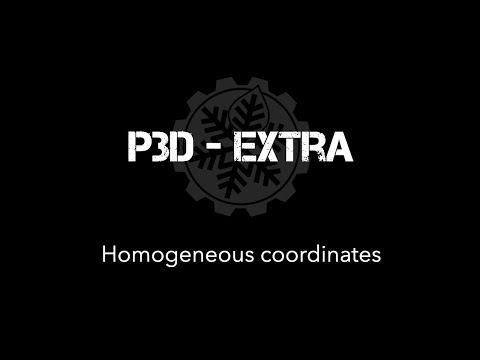

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('EiyL7IVMfwM', width=720, height=480)

# Conclusion

You should do the following activities to enhance your understanding of the concepts viewed in this lesson:
- play with the Python scripts provided;
- do the [exercises](../../exercises/ex_transformations_2d/3e-exercises_rigid.ipynb) related to this lesson, they are necessary to connect concepts;
- modify the markdown by adding your own notes using `> my notes`; and
- complete the tables [Symbol definitions](#Symbol-definitions) and [Glossary](#Glossary) and add your own definitions.

You can try the assignment:
- [Surviving in a flat world](../../exercises/assignement_2d/4-assignment_flat_world.ipynb)

Next module:
- [And now in 3D](../transformations_3d/0-overview.ipynb)

## Symbol definitions

| Symbol        | Definition                                      |
|---------------|-------------                                    |
| $\T[]{}$      | A matrix representing a rigid transformation    |
| $\T[A]{B}$    | ... from frame $\frame{B}$ to frame $\frame{A}$ |
| $\T[]{}^{-1}$ | Inverse of a rigid transformation               |
| ...           |                                                 |

## Glossary

| English               | Français              | Definition |
|-----------            |------------           |------------|
| Rigid transformation  | Transformation rigide |            |
| ...                   |                       |            |